In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


ALPHAS = [0.00016, 0.00018, 0.00020, 0.00022, 0.00024, 0.00026, 0.00028, 0.00030, 0.00032]


X_train = pd.read_csv('./Data/data_cleaned_train_comments_X.csv')
y_train = pd.read_csv('./Data/data_cleaned_train_y.csv')

X_val = pd.read_csv('./Data/data_cleaned_val_comments_X.csv')
y_val = pd.read_csv('./Data/data_cleaned_val_y.csv')

score_best = 0
for alpha in ALPHAS:
    print('alpha:', alpha)
    reg = Lasso(alpha=alpha, max_iter=1e5)
    reg.fit(X_train, y_train)
    score = reg.score(X_val, y_val)
    print('\t training score:', reg.score(X_train, y_train))
    print('\t validation score:', reg.score(X_val, y_val))
    if score > score_best:
        score_best = score
        alpha_best = alpha

print('best alpha:', alpha_best)
reg = Lasso(alpha=alpha_best, max_iter=1e5)
reg.fit(X_train, y_train)
print('training set:', reg.score(X_train, y_train))
y_pred_train = reg.predict(X_train)
y_pred_val = reg.predict(X_val)
print('validation set:', reg.score(X_val, y_val))
coefs = np.array(reg.coef_!=0)
np.save('./Data/selected_coefs.npy', coefs)
print('total number of parameters:', sum(reg.coef_!=0))


alpha: 0.00016
	 training score: 0.547493675963462
	 validation score: 0.49193457417239156
alpha: 0.00018
	 training score: 0.545775124747744
	 validation score: 0.49207834225208813
alpha: 0.0002
	 training score: 0.5443029147861983
	 validation score: 0.4921921283180794
alpha: 0.00022
	 training score: 0.5430688318671344
	 validation score: 0.4924319495393796
alpha: 0.00024
	 training score: 0.5419910117069822
	 validation score: 0.4926599072369271
alpha: 0.00026
	 training score: 0.5409891108568281
	 validation score: 0.49280354325287445
alpha: 0.00028
	 training score: 0.5400062497090938
	 validation score: 0.4929196488464576
alpha: 0.0003
	 training score: 0.5390075424417977
	 validation score: 0.49305763196299607
alpha: 0.00032
	 training score: 0.5379658397059659
	 validation score: 0.49317793586949116
best alpha: 0.00032
training set: 0.5379658397059659
validation set: 0.49317793586949116
total number of parameters: 179


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

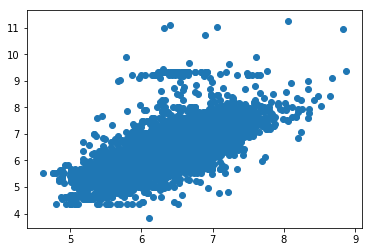

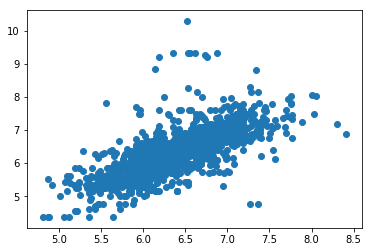

In [2]:
plt.figure(1)
plt.scatter(y_pred_train, y_train)
plt.figure(2)
plt.scatter(y_pred_val, y_val)
plt.show()